<a href="https://colab.research.google.com/github/swarnendu111/Basic-ML-and-DA-in-python-R/blob/master/Fashion(_week_2)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  A Computer Vision Example

But what about a scenario where writing rules  is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.

In [0]:
import tensorflow as tf
print(tf.__version__)

1.13.1


The Fashion MNIST data is available directly in the tf.keras datasets API. load it like this:

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images , training_labels) , (test_images , test_labels) =fashion_mnist.load_data()


print a training image, and a training label to see...Experiment with different indices in the array

7
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

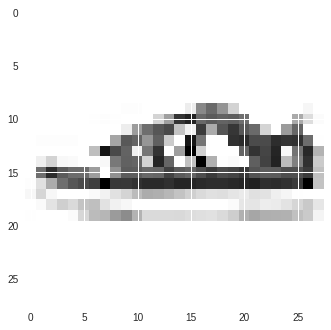

In [0]:
import matplotlib.pyplot as plt
plt.imshow(training_images[5500])
print(training_labels[5500])
print(training_images[5500])

all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [0]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Sequential: That defines a SEQUENCE of layers in the neural network

Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [0]:
import time
start = time. time()

##Exercise 3: 

What would happen if you remove the Flatten() layer. Why do you think that's the case? 

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                      tf.keras.layers.Dense(128, activation=tf.nn.relu),
                      tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

Compiling model with an optimizer and loss function. 

In [0]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])



Using callback function to stop the epoch when acc reaches 0.97

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')> 0.97):
      print("\nReached 97% accuracy so cancelling training!")
      self.model.stop_training = True


In [0]:
callbacks = myCallback()

''model.fit '' asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like.

In [0]:
model.fit(training_images, training_labels, epochs=10 ,)# callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4971 - acc: 0.8250
Epoch 2/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3764 - acc: 0.8643
Epoch 3/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3366 - acc: 0.8780
Epoch 4/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.3137 - acc: 0.8842
Epoch 5/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2957 - acc: 0.8921
Epoch 6/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2821 - acc: 0.8956
Epoch 7/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2670 - acc: 0.9005
Epoch 8/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2577 - acc: 0.9054
Epoch 9/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2488 - acc: 0.9070
Epoch 10/10
60000/60000 [==============================] - 7s 115us/sampl

In [0]:
end = time. time()
print(end - start)


79.01879715919495


In [0]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 61us/sample - loss: 0.3381 - acc: 0.8816


[0.33810758605003355, 0.8816]

In [0]:
classifications = model.predict(test_images)

print(classifications[2])
print(test_labels[2])

[1.35784759e-07 9.99999881e-01 2.37683189e-11 4.37287456e-10
 8.88522422e-10 9.93181232e-13 7.14728786e-13 6.35227933e-27
 1.54605224e-12 1.01429365e-19]
1


CREATING A NN WITH HIDDEN LAYER OF 1024  MAKES THE CALCULATION SOPHISTICATED SO IT TAKES MORE TIME BUT GIVES MUCH MORE ACCURACY

In [0]:
import time
start = time. time()

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10 )



Epoch 1/10
60000/60000 [==============================] - 20s 331us/sample - loss: 0.4723 - acc: 0.8291
Epoch 2/10
60000/60000 [==============================] - 20s 327us/sample - loss: 0.3561 - acc: 0.8713
Epoch 3/10
60000/60000 [==============================] - 20s 336us/sample - loss: 0.3206 - acc: 0.8812
Epoch 4/10
60000/60000 [==============================] - 20s 325us/sample - loss: 0.2960 - acc: 0.8897
Epoch 5/10
60000/60000 [==============================] - 21s 343us/sample - loss: 0.2768 - acc: 0.8967
Epoch 6/10
60000/60000 [==============================] - 19s 322us/sample - loss: 0.2635 - acc: 0.9019
Epoch 7/10
60000/60000 [==============================] - 19s 324us/sample - loss: 0.2502 - acc: 0.9069
Epoch 8/10
60000/60000 [==============================] - 20s 339us/sample - loss: 0.2370 - acc: 0.9111
Epoch 9/10
60000/60000 [==============================] - 19s 313us/sample - loss: 0.2283 - acc: 0.9140
Epoch 10/10
60000/60000 [==============================] - 20s 3

In [0]:
end = time. time()
print(end - start)



198.56065487861633


In [0]:
model.evaluate(test_images, test_labels)



10000/10000 [==============================] - 2s 164us/sample - loss: 0.3282 - acc: 0.8888


[0.32821866466999056, 0.8888]